<a href="https://colab.research.google.com/github/Nithish8658/Nithish8658/blob/main/sales_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset (replace 'your_file_path.xlsx' with your actual file path)
file_path = '/content/sample_data/sales_data_sample.xlsx'
df = pd.read_excel(file_path)

# Show the first few rows to understand the data structure
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

             ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0       2/24/2003 0:00  Shipped       1         2     2003  ...   
1  2003-07-05 00:00:00  Shipped       2         5     2003  ...   
2  2003-01-07 00:00:00  Shipped       3         7     2003  ...   
3       8/25/2003 0:00  Shipped       3         8     2003  ...   
4  2003-10-10 00:00:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue d

1. Handle Missing Values
We’ll check if there are any missing values (nulls) in the dataset, and then decide whether to drop rows or fill missing values with appropriate data (like mean).

In [ ]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print("Null values per column:")
print(null_values)

# Optionally, to get the total number of missing values in the entire dataset:
total_nulls = df.isnull().sum().sum()
print(f"Total missing values: {total_nulls}")


Null values per column:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
Total missing values: 5157


step 2 : we shall input missing values in categorical variables

In [ ]:
# Identify categorical columns with missing values
categorical_cols_with_nulls = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY']

# Fill missing values in categorical columns with 'unknown'
for col in categorical_cols_with_nulls:
    df[col] = df[col].fillna('unknown')

# Verify that the null values have been filled
print(df.isnull().sum())

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


Step 3 : ensuring proper datatype

In [ ]:
# Convert `ORDERDATE` to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Convert numeric columns to appropriate data types (if needed)
df['SALES'] = pd.to_numeric(df['SALES'], errors='coerce')
df['QUANTITYORDERED'] = pd.to_numeric(df['QUANTITYORDERED'], errors='coerce')

# Check data types
print(df.dtypes)


ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object


Step 4: Handle Outliers:

Outliers are extreme values that can skew your analysis. Here’s how you can detect and handle outliers for numerical columns like SALES and QUANTITYORDERED.  Using Z-Score to Detect Outliers and imputing with their mean value
[link text](https://)

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
df['z_sales'] = zscore(df['SALES'])
df['z_quantity'] = zscore(df['QUANTITYORDERED'])

# Set a threshold for outlier detection (commonly 3)
outliers_sales_index = df[df['z_sales'].abs() > 3].index
outliers_quantity_index = df[df['z_quantity'].abs() > 3].index

# Display outliers before handling
print("Outliers in 'SALES' before handling:")
display(df.loc[outliers_sales_index])

print("\nOutliers in 'QUANTITYORDERED' before handling:")
display(df.loc[outliers_quantity_index])

# Replace outliers with the mean of the respective column
df.loc[outliers_sales_index, 'SALES'] = df['SALES'].mean()
df.loc[outliers_quantity_index, 'QUANTITYORDERED'] = df['QUANTITYORDERED'].mean()

# Drop the z-score columns as they are no longer needed
df = df.drop(columns=['z_sales', 'z_quantity'])

# Verify that the outliers have been handled (check min/max or re-calculate z-scores)
print("\nSummary statistics after outlier handling:")
print(df[['SALES', 'QUANTITYORDERED']].describe())

Outliers in 'SALES' before handling:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,z_sales,z_quantity
30,10150,45,100.0,8,10993.50,2003-09-19,Shipped,3,9,2003,...,Singapore,unknown,79903,Singapore,Japan,Natividad,Eric,Large,4.039888,1.017195
43,10304,47,100.0,6,10172.70,2004-11-10,Shipped,4,10,2004,...,Versailles,unknown,78000,France,EMEA,Tonini,Daniel,Large,3.594174,1.222540
44,10312,48,100.0,3,11623.70,2004-10-21,Shipped,4,10,2004,...,San Rafael,CA,97562,USA,unknown,Nelson,Valarie,Large,4.382102,1.325212
53,10424,50,100.0,6,12001.00,2005-05-31,In Process,2,5,2005,...,Madrid,unknown,28034,Spain,EMEA,Freyre,Diego,Large,4.586985,1.530557
81,10120,46,100.0,2,9264.86,2003-04-29,Shipped,2,4,2003,...,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Large,3.101195,1.119867
90,10223,49,100.0,3,9774.03,2004-02-20,Shipped,1,2,2004,...,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Large,3.377687,1.427884
104,10403,66,100.0,9,11886.60,2005-08-04,Shipped,2,4,2005,...,Liverpool,unknown,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large,4.524863,3.173315
105,10417,56,100.0,4,9218.16,2005-05-13,Disputed,2,5,2005,...,Madrid,unknown,28034,Spain,EMEA,Freyre,Diego,Large,3.075836,2.146591
131,10400,64,100.0,9,9661.44,2005-01-04,Shipped,2,4,2005,...,San Jose,CA,94217,USA,unknown,Frick,Sue,Large,3.316547,2.967970
164,10147,48,100.0,7,9245.76,2003-05-09,Shipped,3,9,2003,...,Brickhaven,MA,58339,USA,unknown,Nelson,Allen,Large,3.090823,1.325212



Outliers in 'QUANTITYORDERED' before handling:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,z_sales,z_quantity
25,10417,66,100.00,2,7516.08,2005-05-13,Disputed,2,5,2005,...,Madrid,unknown,28034,Spain,EMEA,Freyre,Diego,Large,2.151565,3.173315
104,10403,66,100.00,9,11886.60,2005-08-04,Shipped,2,4,2005,...,Liverpool,unknown,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large,4.524863,3.173315
264,10403,66,100.00,6,8648.64,2005-08-04,Shipped,2,4,2005,...,Liverpool,unknown,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large,2.766573,3.173315
418,10405,97,93.28,5,9048.16,2005-04-14,Shipped,2,4,2005,...,Strasbourg,unknown,67000,France,EMEA,Citeaux,Frederique,Large,2.983522,6.356159
598,10407,76,100.00,2,14082.80,2005-04-22,On Hold,2,4,2005,...,San Jose,CA,94217,USA,unknown,Frick,Sue,Large,5.717453,4.200039
1188,10406,65,100.00,1,10468.90,2005-04-15,Disputed,2,4,2005,...,Kobenhavn,unknown,1734,Denmark,EMEA,Petersen,Jytte,Large,3.755018,3.070643
1288,10420,66,92.95,6,6134.70,2005-05-29,In Process,2,5,2005,...,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,1.401443,3.173315
1413,10407,66,66.99,4,4421.34,2005-04-22,On Hold,2,4,2005,...,San Jose,CA,94217,USA,unknown,Frick,Sue,Medium,0.471047,3.173315
1666,10412,70,100.00,10,8498.00,2005-03-05,Shipped,2,5,2005,...,Madrid,unknown,28034,Spain,EMEA,Freyre,Diego,Large,2.684771,3.584005
1714,10407,76,94.50,6,7182.00,2005-04-22,On Hold,2,4,2005,...,San Jose,CA,94217,USA,unknown,Frick,Sue,Large,1.970152,4.200039



Summary statistics after outlier handling:
             SALES  QUANTITYORDERED
count  2823.000000      2823.000000
mean   3480.650631        34.904817
std    1693.008187         9.345873
min     482.130000         6.000000
25%    2203.430000        27.000000
50%    3184.800000        35.000000
75%    4420.830000        43.000000
max    9064.890000        64.000000


/tmp/ipython-input-16-2658629165.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.09280906836698' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_quantity_index, 'QUANTITYORDERED'] = df['QUANTITYORDERED'].mean()


Step 5: Create New Columns (Calculated Columns)

Total Sales per Order Line: QUANTITYORDERED * PRICEEACH

In [ ]:
df['Total Sales'] = df['QUANTITYORDERED'] * df['PRICEEACH']

Step 6: Remove Duplicates
Ensure there are no duplicate rows based on a unique identifier like ORDERNUMBER.

In [ ]:
# Drop duplicates based on ORDERNUMBER
df = df.drop_duplicates(subset=['ORDERNUMBER'])

# Check for duplicates after dropping across all columns
print("\nNumber of duplicate rows across all columns after dropping based on ORDERNUMBER:")
print(df.duplicated().sum())


Number of duplicate rows across all columns after dropping based on ORDERNUMBER:
0


Step 7: Verify the Data
It's important to verify that the dataset is correctly preprocessed before using it in Tableau.

In [ ]:
# Display summary statistics and the first few rows
print(df.describe())
print(df.head())


        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        34.904817    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        64.000000   100.000000        18.000000   
std       92.085478         9.345873    20.174277         4.225841   

             SALES                      ORDERDATE       QTR_ID     MONTH_ID  \
count  2823.000000                           2823  2823.000000  2823.000000   
mean   3480.650631  2004-04-25 07:13:04.272050944     2.717676     7.092455   
min     482.130000            2003-01-04 00:00:00     1.000000     1.000000   
25%    2203.430000            2003-10-22 00:00:00    

Step 8: Save the Preprocessed Data
Once the preprocessing steps are complete, save the cleaned data to a new Excel file (xlsx) that can be imported into Tableau.

In [ ]:
# Save the cleaned data to a new Excel file
df.to_excel('preprocessed_sales_data.xlsx', index=False)


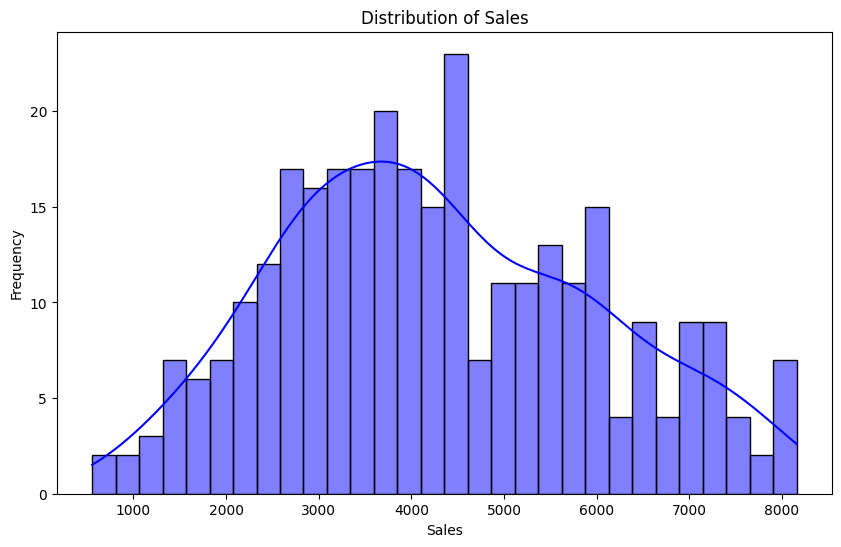

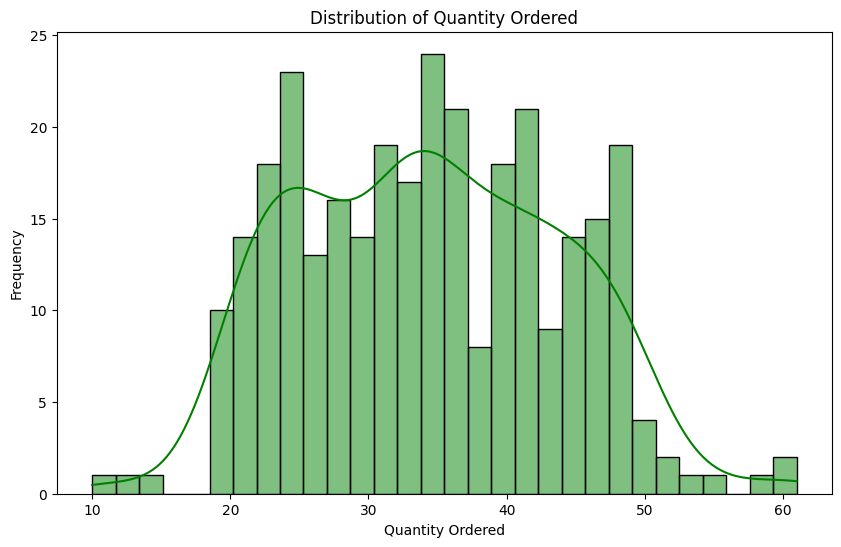

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of SALES
plt.figure(figsize=(10,6))
sns.histplot(df['SALES'], kde=True, color='blue', bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of QUANTITYORDERED
plt.figure(figsize=(10,6))
sns.histplot(df['QUANTITYORDERED'], kde=True, color='green', bins=30)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()


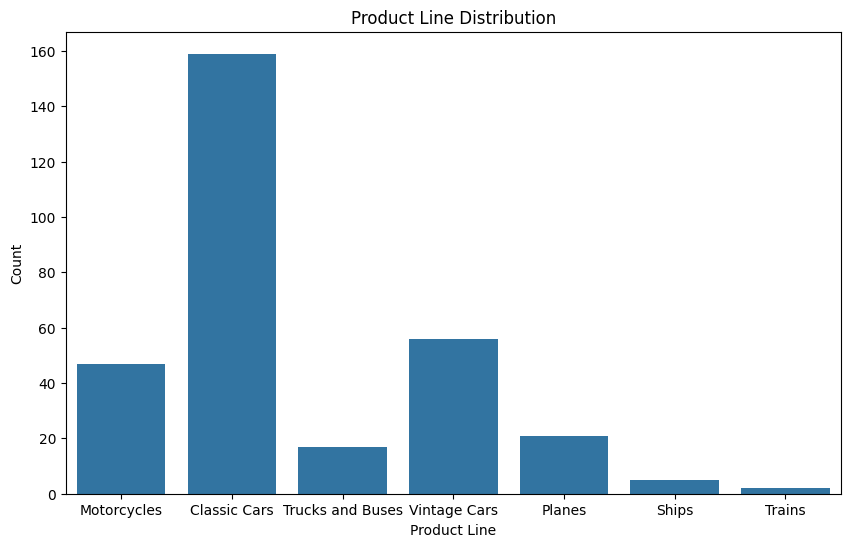

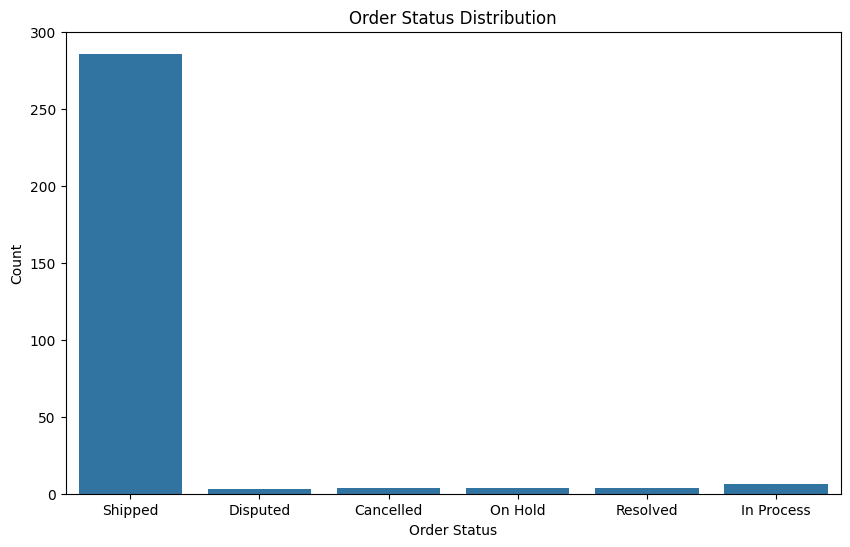

In [ ]:
# Productline distribution
plt.figure(figsize=(10,6))
sns.countplot(x='PRODUCTLINE', data=df)
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

# Status distribution
plt.figure(figsize=(10,6))
sns.countplot(x='STATUS', data=df)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


Sales vs. Deal Size (DEALSIZE)
Why it's useful: Exploring the relationship between sales and deal size can reveal how much revenue comes from small, medium, or large deals. This can help in forecasting and sales strategy.

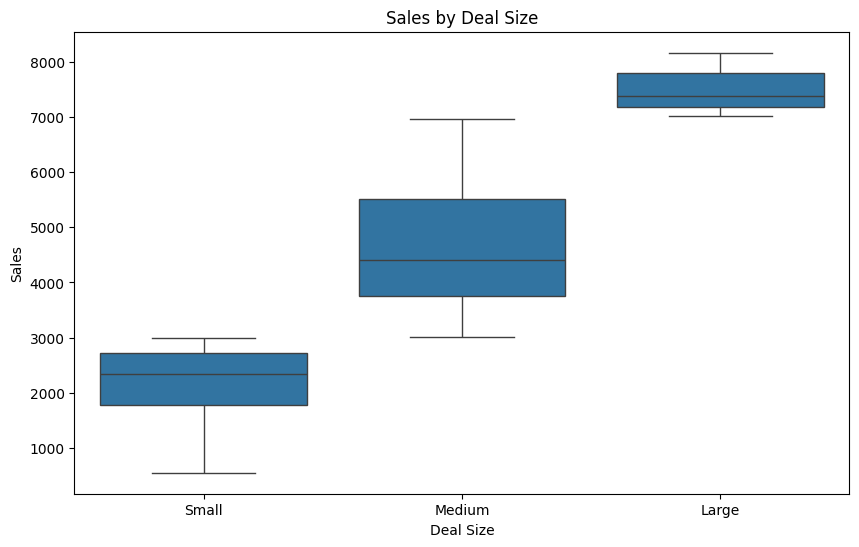

In [ ]:
# Box plot of Sales by Deal Size
plt.figure(figsize=(10,6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()


Sales by Quarter
You can also analyze sales data quarterly to understand performance.

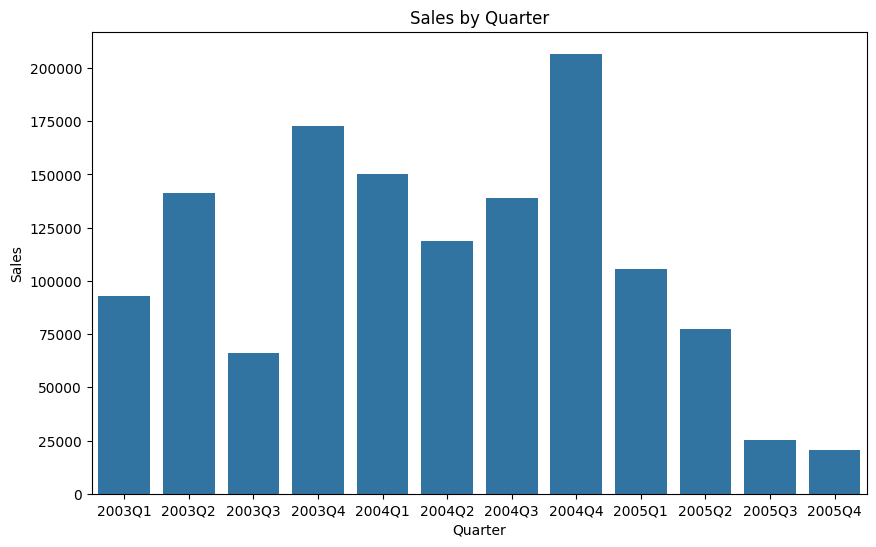

In [ ]:
# Extract Quarter
df['Quarter'] = df['ORDERDATE'].dt.to_period('Q')

# Aggregate sales by Quarter
sales_by_quarter = df.groupby('Quarter')['SALES'].sum().reset_index()

# Plot sales by Quarter
plt.figure(figsize=(10,6))
sns.barplot(x='Quarter', y='SALES', data=sales_by_quarter)
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()


Step 7: Multivariate Analysis
Multivariate analysis allows you to explore relationships between multiple variables at once.

1. Correlation Matrix
Visualize the correlation between numerical variables using a heatmap.

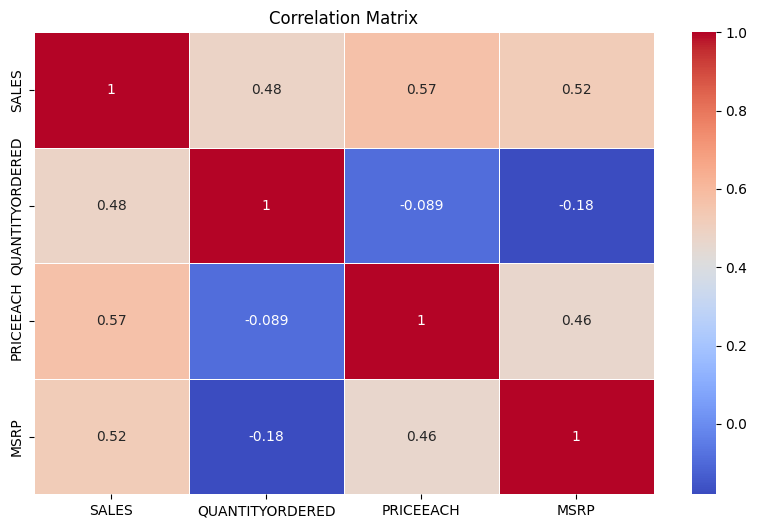

In [ ]:
# Compute correlation matrix
correlation_matrix = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Using NER to Extract State and Territory Names

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd


🧠 Step 2: Load the SpaCy Model

In [ ]:
nlp = spacy.load("en_core_web_sm")


Step 3: Load Your Dataset

Step 4: Apply NER to Extract GPE (Geo-Political Entities like states, countries, cities)

In [ ]:
# Display the first few rows of the updated DataFrame
display(df.head())

,lower(ORDERNUMBER),QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,z_sales,z_quantity,extracted_state,extracted_territory,extracted_postalcode
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,USA,unknown,Yu,Kwai,Small,-0.332958,-0.503614,[],[],[]
1,10121,34,81.35,5,2765.90,2003-07-05,Shipped,2,5,2003,...,France,EMEA,Henriot,Paul,Small,-0.398908,-0.069071,[],[],[]
2,10134,41,94.74,2,3884.34,2003-01-07,Shipped,3,7,2003,...,France,EMEA,Da Cunha,Daniel,Medium,0.302911,0.691380,[],[],[]
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,USA,unknown,Young,Julie,Medium,0.216542,1.125924,[],[],[]
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,USA,unknown,Brown,Julie,Medium,1.131793,1.560467,[],[],[]


In [ ]:
def extract_locations(text):
    doc = nlp(str(text))
    return [ent.text for ent in doc.ents if ent.label_ == "GPE"]

# Apply to dataset
df['extracted_locations'] = df['CITY'].apply(extract_locations)

In [ ]:
df.head()

,lower(ORDERNUMBER),QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,z_sales,z_quantity,extracted_state,extracted_territory,extracted_postalcode,extracted_locations
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,unknown,Yu,Kwai,Small,-0.332958,-0.503614,[],[],[],[]
1,10121,34,81.35,5,2765.90,2003-07-05,Shipped,2,5,2003,...,EMEA,Henriot,Paul,Small,-0.398908,-0.069071,[],[],[],[]
2,10134,41,94.74,2,3884.34,2003-01-07,Shipped,3,7,2003,...,EMEA,Da Cunha,Daniel,Medium,0.302911,0.691380,[],[],[],[Paris]
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,unknown,Young,Julie,Medium,0.216542,1.125924,[],[],[],[]
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,unknown,Brown,Julie,Medium,1.131793,1.560467,[],[],[],[San Francisco]


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd


In [ ]:
nlp = spacy.load("en_core_web_sm")


In [ ]:
import pandas as pd

# Load the dataset (replace 'your_file_path.xlsx' with your actual file path)
file_path = '/content/sample_data/preprocessed_sales_data.xlsx'
df = pd.read_excel(file_path)

# Show the first few rows to understand the data structure
print(df.head())

   lower(ORDERNUMBER)  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0               10107               30      95.70                2  2871.00   
1               10121               34      81.35                5  2765.90   
2               10134               41      94.74                2  3884.34   
3               10145               45      83.26                6  3746.70   
4               10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...           CITY    STATE  \
0 2003-02-24  Shipped       1         2     2003  ...            NYC       NY   
1 2003-07-05  Shipped       2         5     2003  ...          Reims  unknown   
2 2003-01-07  Shipped       3         7     2003  ...          Paris  unknown   
3 2003-08-25  Shipped       3         8     2003  ...       Pasadena       CA   
4 2003-10-10  Shipped       4        10     2003  ...  San Francisco       CA   

  POSTALCODE COUNTRY TERRITORY CONTACT

In [ ]:
def extract_locations(text):
    doc = nlp(str(text))
    return [ent.text for ent in doc.ents if ent.label_ == "GPE"]

# Apply to dataset
df['extracted_locations'] = df['State'].apply(extract_locations)


KeyError: 'State'